In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston=load_boston()
dfX=pd.DataFrame(boston.data, columns=boston.feature_names)
dfy=pd.DataFrame(boston.target, columns=["MEDV"])
df=pd.concat([dfX, dfy], axis=1)


c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [2]:
import statsmodels.api as sm
model=sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df)
                        # 종속변수       feature_names 중간에 +
result=model.fit()
result.summary()

#Cond. No.	1.51e+04
#strong multicollinearity or other numerical problems.
#강한 다중공선성 우려

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          6.72e-135
Time:                        15:20:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
#변수들의 표준편차 비교
dfX.describe().loc["std"] 

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

<AxesSubplot:>

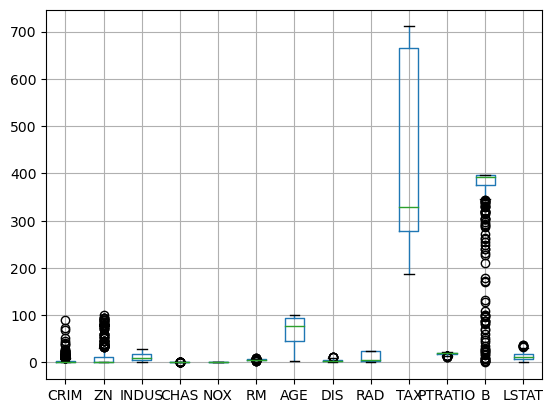

In [4]:
%matplotlib inline
dfX.boxplot()

In [6]:
# 변수들의 평균값 계산
mean_on_train=dfX.mean(axis=0)

# 변수들의 표준편차값 계산
std_on_train=dfX.std(axis=0)

In [7]:
# 정규화
dfX_scaled=(dfX-mean_on_train)/std_on_train

print(dfX_scaled.head())
print(dfX_scaled.describe())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487  
               CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean   

<AxesSubplot:>

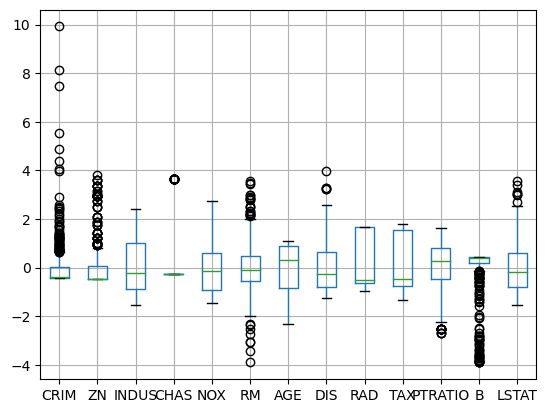

In [8]:
dfX_scaled.boxplot()

In [9]:
df_scaled=pd.concat([dfX_scaled, dfy], axis=1)

In [10]:
model=sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_scaled)
result=model.fit()
result.summary()

#Cond. No.	9.82

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          6.72e-135
Time:                        15:22:21   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.211    106.814      0.000      22.118      22.947
CRIM          -0.9291      0.283     -3.287      0.001      -1.484      -0.374
ZN             1.0826      0.320      3.382      0.001       0.454       1.712
INDUS          0.1410      0.422      0.334      0.738      -0.688       0.970
CHAS           0.6824      0.219      3.118      0.002       0.252       1.112
NOX           -2.0588      0.443     -4.651      0.000      -2.928      -1.189
RM             2.6769      0.294      9.116      0.000       2.100       3.254
AGE            0.0195      0.372      0.052      0.958      -0.711       0.750
DIS           -3.1071      0.420     -7.398      0.000      -3.932      -2.282
RAD            2.6649      0.578      4.613      0.000       1.530       3.800
TAX           -2.0788      0.634     -3.280      0.001      -3.324      -0.834
PTRATIO       -2.0626      0.283     -7.283      0.000      -2.619      -1.506
B              0.8501      0.245      3.467      0.001       0.368       1.332
LSTAT         -3.7473      0.362    -10.347      0.000      -4.459      -3.036
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""